Этот ноутбук воспроизводит ключевые графики и таблицы, использованные в препринте.
- Он скачивает репозиторий ai_society_simulations с GitHub.
- Устанавливает зависимости.
- Запускает сценарий из scripts/repro.py.
- Складывает результаты (png и csv) в папку figures/.

В ноутбуке нет приватных данных. Это минимальная проверка воспроизводимости.
Спасибо, что запустили его 💙


In [1]:
import os
import sys
import shutil
import subprocess
from pathlib import Path

REPO_URL = "https://github.com/Alekol1970/ai_society_simulations.git"
REPO_DIR = "ai_society_simulations"

# 1. Клонируем репозиторий, если его ещё нет в среде Colab
if not Path(REPO_DIR).exists():
    print("→ Клонируем репозиторий из GitHub...")
    subprocess.run(["git", "clone", REPO_URL], check=True)
else:
    print("→ Репозиторий уже есть, пропускаем clone.")

# 2. Переходим в корень репозитория
os.chdir(REPO_DIR)
print("→ Текущая рабочая папка:", os.getcwd())

# 3. Устанавливаем зависимости (numpy, pandas, matplotlib, и т.д.)
#    Colab уже даёт Python и pip. Мы просто ставим то, что в requirements.txt
print("→ Устанавливаем зависимости из requirements.txt ...")
subprocess.run([sys.executable, "-m", "pip", "install", "-r", "requirements.txt"], check=True)

print("✓ Готово: окружение настроено.")


→ Репозиторий уже есть, пропускаем clone.
→ Текущая рабочая папка: /content/ai_society_simulations
→ Устанавливаем зависимости из requirements.txt ...
✓ Готово: окружение настроено.


In [2]:
import os
import sys
from pathlib import Path

# Убедимся, что корень репозитория (текущая папка) есть в sys.path
repo_root = Path(os.getcwd()).resolve()
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

print("→ sys.path[0]:", sys.path[0])

from scripts.repro import (
    run_grid,
    run_charter_generator,
    fig1,
    fig2,
    figs7_robustness_ER_seedfrac_seed,
    main as repro_main,
)

print("✓ Импортировали scripts.repro без ошибок.")


→ sys.path[0]: /content/ai_society_simulations
✓ Импортировали scripts.repro без ошибок.


→ Запускаем полный пайплайн воспроизведения...
Found existing data/charter_countries.csv — skip
Found existing data/charter_countries.csv — skip
Done. Figures in ./figures; data ensured in ./data
✓ Готово. Все .png и .csv должны лежать в папке figures/.


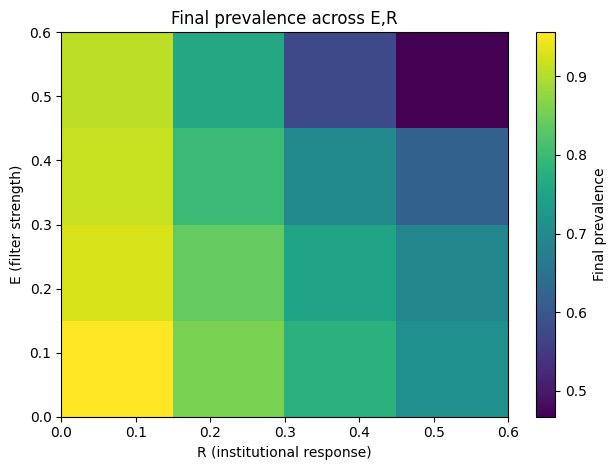

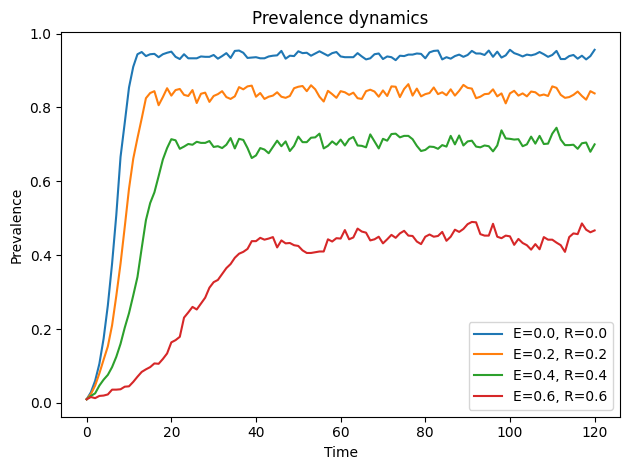

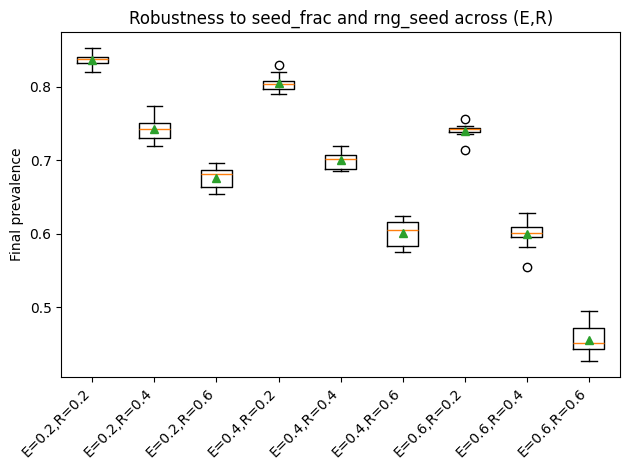

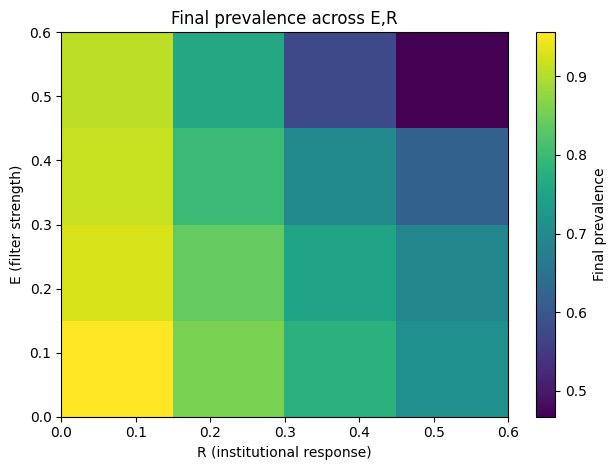

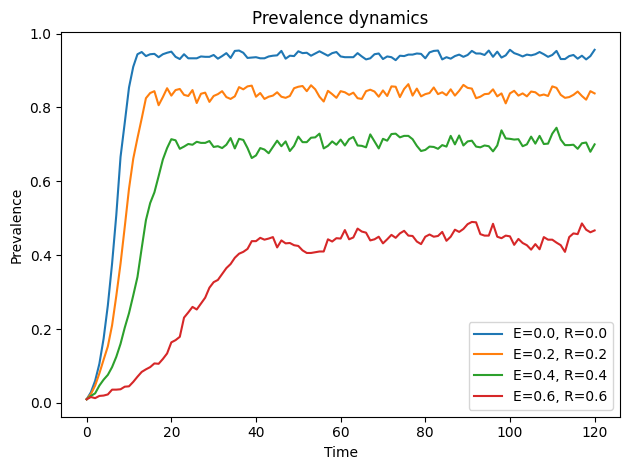

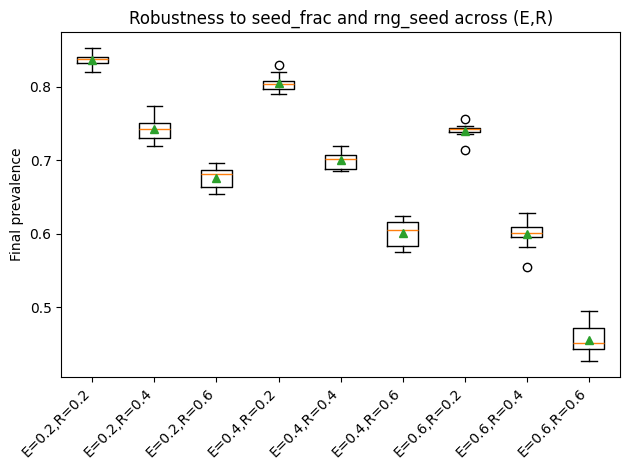

In [3]:
print("→ Запускаем полный пайплайн воспроизведения...")

# 1. Создаём/обновляем charter_countries.csv и любые данные, нужные таблицам
run_charter_generator()

# 2. Запускаем решётку симуляций (E,R) и получаем результаты как DataFrame / массивы
res = run_grid()

# 3. Генерируем основные фигуры из текста
fig1(res)
fig2(res)

# 4. Генерируем робастность (бывшая Fig.3 / сейчас S7 в приложении A)
figs7_robustness_ER_seedfrac_seed()

# 5. Делаем то же самое, но чтобы точно совпало с логикой командной строки
repro_main()

print("✓ Готово. Все .png и .csv должны лежать в папке figures/.")


Спасибо, что запустили этот ноутбук 💙

Если вы — рецензент или исследователь, для нас важно, что вы проверяете воспроизводимость, а не просто доверяете словам в тексте.

Все артефакты (рисунки и .csv), на которые ссылается препринт, должны сейчас лежать в папке figures/.


---

Если вы используете этот ноутбук или код,
пожалуйста, цитируйте репозиторий и DOI Zenodo:
10.5281/zenodo.17390730.

Этот ноутбук не требует ручной настройки данных:
все файлы генерируются скриптом `scripts/repro.py`
и сохраняются в `./figures` и `./data`.
